In [1]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import keras
from skimage.transform import resize

In [2]:
def corp_margin(img):
    img2=img.sum(axis=2)
    (row,col)=img2.shape
    row_top=0
    raw_down=0
    col_top=0
    col_down=0
    for r in range(0,row):
            if img2.sum(axis=1)[r]<700*col:
                    row_top=r
                    break

    for r in range(row-1,0,-1):
            if img2.sum(axis=1)[r]<700*col:
                    raw_down=r
                    break

    for c in range(0,col):
            if img2.sum(axis=0)[c]<700*row:
                    col_top=c
                    break

    for c in range(col-1,0,-1):
            if img2.sum(axis=0)[c]<700*row:
                    col_down=c
                    break

    new_img=img[row_top:raw_down+1,col_top:col_down+1,0:3]
    return new_img

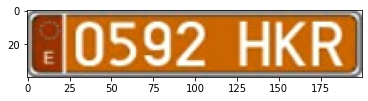

In [90]:
img = cv.imread('images/national/0592HKR.jpg')
img = corp_margin(img)
image = cv.resize(img, (200,40), interpolation=cv.INTER_CUBIC)
plt.imshow(corp_margin(image))

In [9]:
model = keras.models.load_model('/content/gdrive/My Drive/keras_model/lecturaConPesos')


In [4]:
def prediction(caracter):
    carac = resize(caracter,(32, 32, 1))
    clases = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
    carac = carac.astype('float32')
    carac /= 255
    carac = carac.reshape(1, 32, 32, 1)
    predic = model.predict(carac)
    solucion = clases[np.argmax(predic)]
    return solucion

In [25]:
def plate(image):
    matricula = ''
    img = corp_margin(image)
    image = cv.resize(img, (200,40), interpolation=cv.INTER_CUBIC)
    recorte = image[5:35, 24:]
    for i in range(0, 8):
        caracter = recorte[:, i*20:i*20+24]
        if i == 4:
            pass
        else:
            matricula = matricula + prediction(caracter)
    return matricula

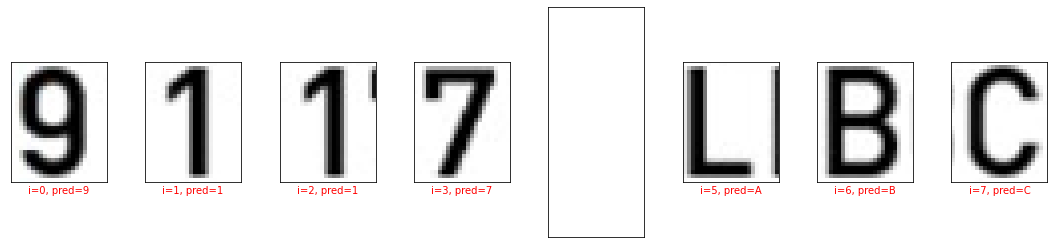

In [26]:
#funcion que plotea cada caracter de la matricula junto con su prediccion
def plot(image):
    matricula = ''
    img = corp_margin(image)
    image = cv.resize(img, (200,40), interpolation=cv.INTER_CUBIC)
    recorte = image[5:35, 24:]
    for i in range(0, 8):
        plt.subplot(1, 8, i+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        caracter = recorte[:, i*20:i*20+24]
        if i == 4:
            pass
        else:
            pred = prediction(caracter)        
                
            plt.xlabel('i={}, pred={}'.format(i, pred), color='red')
            plt.imshow(caracter, cmap='gray')
            plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=2.5,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
    plt.show()

imag = cv.imread('images/national/9117LBC.jpg')
plot(imag)

In [27]:
#a traves de una ruta detecta las matriculas de todas las imagenes de una carpeta
def predictplates(ruta):
    correct = 0
    total = 0
    for root, dirnames, filenames in os.walk(ruta):
        dirnames.sort()
        for filename in filenames:
            filepath = os.path.join(root, filename)
            image = cv.imread(filepath)
            mat = plate(image)
            name = filename[0:filename.index('.')]
            print("Matricula: ", name, "La matricula detectada es: ",mat)
            if name == mat:
                print("Matricula correcta")
                correct = correct + 1
                total = total + 1
            else:
                print("Matricula incorrecta")
                total = total + 1
        print("Matriculas acertadas: ", correct,"/",total)

predictplates('images/national')

Matricula:  0103LLY La matricula detectada es:  O0O3LLY
Matricula incorrecta
Matricula:  0109LPX La matricula detectada es:  OOO9LPX
Matricula incorrecta
Matricula:  0332KRK La matricula detectada es:  0332KRK
Matricula correcta
Matricula:  0392KYP La matricula detectada es:  O392KYP
Matricula incorrecta
Matricula:  0402LTR La matricula detectada es:  O402LTR
Matricula incorrecta
Matricula:  0406LTR La matricula detectada es:  O406LTR
Matricula incorrecta
Matricula:  0409LTR La matricula detectada es:  O409LTR
Matricula incorrecta
Matricula:  0592HKR La matricula detectada es:  O592HKR
Matricula incorrecta
Matricula:  0789HZF La matricula detectada es:  07B9H2F
Matricula incorrecta
Matricula:  0910KXB La matricula detectada es:  O910KXB
Matricula incorrecta
Matricula:  1070HNY La matricula detectada es:  1O7OHNY
Matricula incorrecta
Matricula:  1127GFF La matricula detectada es:  1127GFF
Matricula correcta
Matricula:  1657LTH La matricula detectada es:  16S7LTH
Matricula incorrecta
Mat